### Visualizing Embeddings from Presentation Slides
In this Notebook, three different types of Embeddings (text, visual, mixed) are compared and tested, in terms of their suitability to cluster Presentation slides based on their content. 
The data is stored via [Huggingface](https://huggingface.co/datasets/ScaDS-AI/SlightInsight_Cache).

In [1]:
from caching import load_full_hf_cache
import pandas as pd
import dask.array as da
import dask
import requests
import numpy as np
import stackview
from io import BytesIO
from pdf2image import convert_from_bytes
import dask.array as da
import numpy as np
import umap.umap_ as umap
import os
from PIL import Image

repo_name = "ScaDS-AI/SlideInsight_Cache"
df = load_full_hf_cache(repo_name=repo_name)

In [2]:
df.head()

,key,zenodo_record_id,zenodo_filename,page_number,text_embedding,visual_embedding,mixed_embedding,extracted_text
0,record10008464_pdf1_slide1,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,1,"[0.8054575, -0.4204579, 0.111390926, 0.2636367...","[0.22024887800216675, 0.6564452648162842, 0.02...","[0.22330284, -0.5643485, 0.32713842, -0.074667...","Welcome to\nBioImage Town!\nJosh Moore, Senior..."
1,record10008464_pdf1_slide2,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,2,"[1.1522328, 0.02467385, 0.23145455, 0.17258961...","[-0.3846272826194763, -0.01668522134423256, -0...","[0.34757608, -0.6562839, 0.5335755, -0.1906935...",Special welcome\nHonored New\nGuests Colleague...
2,record10008464_pdf1_slide3,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,3,"[1.0057557, 0.18344171, 0.03796136, 0.23549518...","[-0.32376205921173096, 0.06897055357694626, 0....","[0.06456853, -0.79703176, 0.871621, -0.8768049...",Value of bioimages\nhttps://ome-model.readthed...
3,record10008464_pdf1_slide4,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,4,"[1.2563236, 0.25261688, 0.0040982994, 0.202414...","[-0.03493745997548103, -0.11242333054542542, 0...","[0.3643795, -0.40593308, 0.97395766, -0.495041...",Value of bioimages\nAll-Hands Meeting · Josh M...
4,record10008464_pdf1_slide5,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,5,"[0.8471789, -0.40933934, 0.85754687, -0.496454...","[-0.6693567037582397, -0.02434205450117588, -0...","[-0.22939722, -0.6752343, 0.57570195, 0.046955...","Image Data Management isn’t always FAIR\n""Clar..."


#### Perform UMAP for each Embeddingtype for each Slide

In [3]:
# Initialize UMAP reducer
reducer = umap.UMAP(n_components=2, random_state=42)

# Initialize a dictionary to store UMAP results
umap_results = {}

# Apply UMAP to each embedding type
for embedding_type in ['text_embedding', 'visual_embedding', 'mixed_embedding']:
    # Convert embeddings to a numpy array
    embeddings = np.array(df[embedding_type].tolist())
    
    # Apply UMAP
    umap_embeddings = reducer.fit_transform(embeddings)
    
    # Store results in the dictionary
    umap_results[embedding_type] = {
        'UMAP0': umap_embeddings[:, 0],
        'UMAP1': umap_embeddings[:, 1]
    }

# Create a new DataFrame to hold UMAP results for each embedding type
df_umap = df.copy()

for embedding_type, umap_data in umap_results.items():
    df_umap[f"{embedding_type}_UMAP0"] = umap_data['UMAP0']
    df_umap[f"{embedding_type}_UMAP1"] = umap_data['UMAP1']

# Output the DataFrame with UMAP results
df_umap.head()

/home/lea/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


,key,zenodo_record_id,zenodo_filename,page_number,text_embedding,visual_embedding,mixed_embedding,extracted_text,text_embedding_UMAP0,text_embedding_UMAP1,visual_embedding_UMAP0,visual_embedding_UMAP1,mixed_embedding_UMAP0,mixed_embedding_UMAP1
0,record10008464_pdf1_slide1,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,1,"[0.8054575, -0.4204579, 0.111390926, 0.2636367...","[0.22024887800216675, 0.6564452648162842, 0.02...","[0.22330284, -0.5643485, 0.32713842, -0.074667...","Welcome to\nBioImage Town!\nJosh Moore, Senior...",4.349257,15.649370,2.290721,4.030360,6.215046,5.449649
1,record10008464_pdf1_slide2,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,2,"[1.1522328, 0.02467385, 0.23145455, 0.17258961...","[-0.3846272826194763, -0.01668522134423256, -0...","[0.34757608, -0.6562839, 0.5335755, -0.1906935...",Special welcome\nHonored New\nGuests Colleague...,4.440335,15.576064,0.479455,3.763225,6.328477,5.809029
2,record10008464_pdf1_slide3,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,3,"[1.0057557, 0.18344171, 0.03796136, 0.23549518...","[-0.32376205921173096, 0.06897055357694626, 0....","[0.06456853, -0.79703176, 0.871621, -0.8768049...",Value of bioimages\nhttps://ome-model.readthed...,4.469594,15.702904,-1.180286,-0.592671,5.266545,5.810560
3,record10008464_pdf1_slide4,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,4,"[1.2563236, 0.25261688, 0.0040982994, 0.202414...","[-0.03493745997548103, -0.11242333054542542, 0...","[0.3643795, -0.40593308, 0.97395766, -0.495041...",Value of bioimages\nAll-Hands Meeting · Josh M...,4.481730,15.709163,-1.239366,-0.709463,5.341550,5.900559
4,record10008464_pdf1_slide5,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,5,"[0.8471789, -0.40933934, 0.85754687, -0.496454...","[-0.6693567037582397, -0.02434205450117588, -0...","[-0.22939722, -0.6752343, 0.57570195, 0.046955...","Image Data Management isn’t always FAIR\n""Clar...",6.484576,10.051550,1.555637,3.363439,9.302834,6.665651


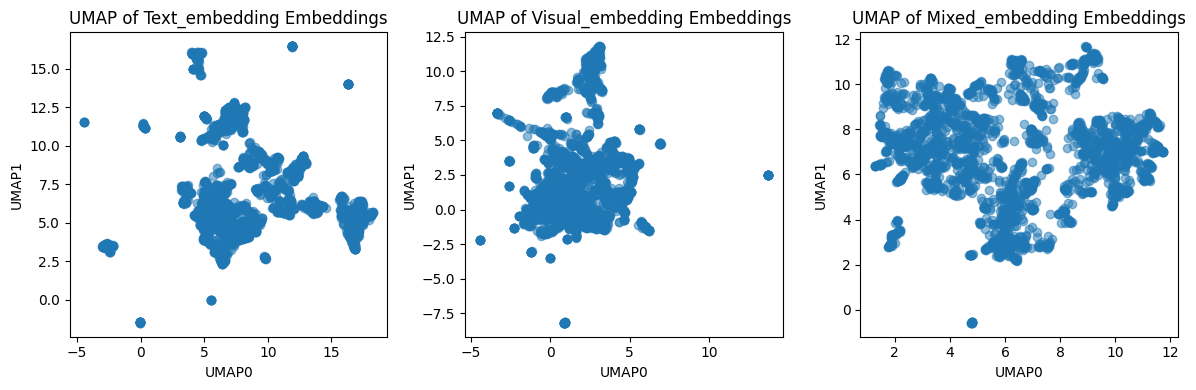

In [4]:
import matplotlib.pyplot as plt

# Define embedding types for visualization
embedding_types = ['text_embedding', 'visual_embedding', 'mixed_embedding']

# Plot UMAP results for each embedding type
plt.figure(figsize=(12, 4))

for i, embedding_type in enumerate(embedding_types, 1):
    plt.subplot(1, 3, i)
    plt.scatter(df_umap[f"{embedding_type}_UMAP0"], df_umap[f"{embedding_type}_UMAP1"], alpha=0.5)
    plt.xlabel("UMAP0")
    plt.ylabel("UMAP1")
    plt.title(f"UMAP of {embedding_type.capitalize()} Embeddings")

plt.tight_layout()
plt.show()


## Use this Image Dataset to match image of Slides and Embeddings to visualize the whole dataset using sliceplot

In [11]:
from datasets import load_dataset
import numpy as np
from tqdm import tqdm

dataset_name = "ScaDS-AI/Slide_Insight_Images"
dataset = load_dataset(dataset_name, split="train", streaming=True)

keys = df["key"].values
matched_data = [] 

for sample in tqdm(dataset, desc="Processing and resizing images"):
    key = sample["key"]

    if key in keys:
        img = sample["image"]
        w, h = img.size
        scale = 384 / min(w, h)
        img = img.resize((int(w * scale), int(h * scale)), Image.LANCZOS)

        img_array = np.array(img)

        matched_data.append({"key": key, "image": img_array})

# Convert to DataFrame
df_images = pd.DataFrame(matched_data)

Processing and resizing images: 2617it [07:48,  5.59it/s]


In [12]:
# Merge embeddings DataFrame (`df_umap`) with images DataFrame (`df_images`) based on "key"
df_merged = df_umap.merge(df_images, on="key", how="inner")  # Keep only matching keys

### Process Image Data

In [13]:
def pad_image(img_array, target_height, target_width):
    height, width, channels = img_array.shape
    padded = np.zeros((target_height, target_width, channels), dtype=img_array.dtype)
    # Center the image
    pad_top = (target_height - height) // 2
    pad_left = (target_width - width) // 2
    padded[pad_top:pad_top+height, pad_left:pad_left+width, :] = img_array
    return padded

max_height = max(img.shape[0] for img in df_merged["image"])
max_width = max(img.shape[1] for img in df_merged["image"])

# Pad all images
padded_images = [
    pad_image(img, max_height, max_width) for img in df_merged["image"]
]

# Now safely stack to NumPy array
images_np = np.array(padded_images)

In [14]:
# Visualize with stackview
stackview.sliceplot(
    df_merged,
    images_np,
    column_x="text_embedding_UMAP0",
    column_y="text_embedding_UMAP1",
    zoom_factor=1,
    zoom_spline_order=2
)

# Visualize using Wordcloud Plot

In [5]:
stackview.wordcloudplot(df_umap, column_text="extracted_text", column_x="text_embedding_UMAP0", column_y="text_embedding_UMAP1")

### remove the "largest" words, that don't refer to any content topic, but rather to authors, fill words, etc.

In [6]:
import re

def clean_text(text, large_words):
    text = text.lower()  # Convert text to lowercase for uniformity
    
    # Remove multi-word phrases first
    for phrase in sorted(large_words, key=len, reverse=True):  # Sort by length to prevent partial replacements
        text = re.sub(r'\b' + re.escape(phrase.lower()) + r'\b', '', text)

    # Remove single letters (except 'I' and 'a' which are valid words)
    text = re.sub(r'\b[a-zA-Z]\b', '', text) 

    # Remove any extra spaces created by removals
    text = re.sub(r'\s+', ' ', text).strip()

    return text
    
large_words = ['Robert Haase', 'haesleinhuepf', 'Haase', 'haesleinhuepf BIDS', 'robert haase', 'welcome', 'town', 'et al', 'i3d bio', 'logo small', 'use', 'cid', 'dataweekleipzig april',
               'haase haesleinhuepf', 'bids lecture', 'haesleinhuepf bids', 'der', 'die', 'und', 'josh moore', 'meeting josh','moore welcome', 'bioimage town', 'https', 'meeting welcome', 'hands meeting']
large_words_lo = [word.lower() for word in large_words]

df_umap["cleaned_text"] = df_umap["extracted_text"].apply(lambda x: clean_text(x, large_words_lo))

df_umap.head()

,key,zenodo_record_id,zenodo_filename,page_number,text_embedding,visual_embedding,mixed_embedding,extracted_text,text_embedding_UMAP0,text_embedding_UMAP1,visual_embedding_UMAP0,visual_embedding_UMAP1,mixed_embedding_UMAP0,mixed_embedding_UMAP1,cleaned_text
0,record10008464_pdf1_slide1,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,1,"[0.8054575, -0.4204579, 0.111390926, 0.2636367...","[0.22024887800216675, 0.6564452648162842, 0.02...","[0.22330284, -0.5643485, 0.32713842, -0.074667...","Welcome to\nBioImage Town!\nJosh Moore, Senior...",4.349257,15.649370,2.290721,4.030360,6.215046,5.449649,"to ! , senior rdm officer german bioimaging, ...."
1,record10008464_pdf1_slide2,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,2,"[1.1522328, 0.02467385, 0.23145455, 0.17258961...","[-0.3846272826194763, -0.01668522134423256, -0...","[0.34757608, -0.6562839, 0.5335755, -0.1906935...",Special welcome\nHonored New\nGuests Colleague...,4.440335,15.576064,0.479455,3.763225,6.328477,5.809029,special honored new guests colleagues all- · ·...
2,record10008464_pdf1_slide3,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,3,"[1.0057557, 0.18344171, 0.03796136, 0.23549518...","[-0.32376205921173096, 0.06897055357694626, 0....","[0.06456853, -0.79703176, 0.871621, -0.8768049...",Value of bioimages\nhttps://ome-model.readthed...,4.469594,15.702904,-1.180286,-0.592671,5.266545,5.810560,value of bioimages ://ome-model.readthedocs.io...
3,record10008464_pdf1_slide4,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,4,"[1.2563236, 0.25261688, 0.0040982994, 0.202414...","[-0.03493745997548103, -0.11242333054542542, 0...","[0.3643795, -0.40593308, 0.97395766, -0.495041...",Value of bioimages\nAll-Hands Meeting · Josh M...,4.481730,15.709163,-1.239366,-0.709463,5.341550,5.900559,value of bioimages all- · · to bioimage 16/10/...
4,record10008464_pdf1_slide5,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,5,"[0.8471789, -0.40933934, 0.85754687, -0.496454...","[-0.6693567037582397, -0.02434205450117588, -0...","[-0.22939722, -0.6752343, 0.57570195, 0.046955...","Image Data Management isn’t always FAIR\n""Clar...",6.484576,10.051550,1.555637,3.363439,9.302834,6.665651,"image data management isn’ always fair ""clara ..."


### Plot Wordcloud with the cleaned Text

In [7]:
stackview.wordcloudplot(df_umap, column_text="cleaned_text", column_x="text_embedding_UMAP0", column_y="text_embedding_UMAP1")

### create new embeddings for the cleaned text

In [8]:
from sentence_transformers import SentenceTransformer

text_model = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1")

def calculate_cleaned_text_embedding(df):
    df["cleaned_text_embedding"] = df["cleaned_text"].apply(lambda text: text_model.encode(text))
    return df

df_cleaned_umap = calculate_cleaned_text_embedding(df_umap)
df_cleaned_umap.head()

,key,zenodo_record_id,zenodo_filename,page_number,text_embedding,visual_embedding,mixed_embedding,extracted_text,text_embedding_UMAP0,text_embedding_UMAP1,visual_embedding_UMAP0,visual_embedding_UMAP1,mixed_embedding_UMAP0,mixed_embedding_UMAP1,cleaned_text,cleaned_text_embedding
0,record10008464_pdf1_slide1,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,1,"[0.8054575, -0.4204579, 0.111390926, 0.2636367...","[0.22024887800216675, 0.6564452648162842, 0.02...","[0.22330284, -0.5643485, 0.32713842, -0.074667...","Welcome to\nBioImage Town!\nJosh Moore, Senior...",4.349257,15.649370,2.290721,4.030360,6.215046,5.449649,"to ! , senior rdm officer german bioimaging, ....","[0.042426012, -0.89079297, 0.057670906, 0.0328..."
1,record10008464_pdf1_slide2,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,2,"[1.1522328, 0.02467385, 0.23145455, 0.17258961...","[-0.3846272826194763, -0.01668522134423256, -0...","[0.34757608, -0.6562839, 0.5335755, -0.1906935...",Special welcome\nHonored New\nGuests Colleague...,4.440335,15.576064,0.479455,3.763225,6.328477,5.809029,special honored new guests colleagues all- · ·...,"[0.7079524, -0.17202653, 0.34157243, -0.035585..."
2,record10008464_pdf1_slide3,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,3,"[1.0057557, 0.18344171, 0.03796136, 0.23549518...","[-0.32376205921173096, 0.06897055357694626, 0....","[0.06456853, -0.79703176, 0.871621, -0.8768049...",Value of bioimages\nhttps://ome-model.readthed...,4.469594,15.702904,-1.180286,-0.592671,5.266545,5.810560,value of bioimages ://ome-model.readthedocs.io...,"[0.46466017, -0.066745, 0.4495966, -0.43806577..."
3,record10008464_pdf1_slide4,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,4,"[1.2563236, 0.25261688, 0.0040982994, 0.202414...","[-0.03493745997548103, -0.11242333054542542, 0...","[0.3643795, -0.40593308, 0.97395766, -0.495041...",Value of bioimages\nAll-Hands Meeting · Josh M...,4.481730,15.709163,-1.239366,-0.709463,5.341550,5.900559,value of bioimages all- · · to bioimage 16/10/...,"[0.6627006, 0.2701034, 0.45130086, -0.22349824..."
4,record10008464_pdf1_slide5,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,5,"[0.8471789, -0.40933934, 0.85754687, -0.496454...","[-0.6693567037582397, -0.02434205450117588, -0...","[-0.22939722, -0.6752343, 0.57570195, 0.046955...","Image Data Management isn’t always FAIR\n""Clar...",6.484576,10.051550,1.555637,3.363439,9.302834,6.665651,"image data management isn’ always fair ""clara ...","[0.7091498, -0.31824884, 0.7514462, -0.7678594..."


### calculate a new UMAP

In [9]:
# Initialize a dictionary to store UMAP results
cleaned_umap_results = {}
embeddings = np.array(df_cleaned_umap['cleaned_text_embedding'].tolist())

# Apply UMAP
cleaned_umap_embeddings = reducer.fit_transform(embeddings)

# Store results in the dictionary
cleaned_umap_results['cleaned_text_embedding'] = {
    'UMAP0': cleaned_umap_embeddings[:, 0],
    'UMAP1': cleaned_umap_embeddings[:, 1]
}

for embedding_type, umap_data in cleaned_umap_results.items():
    df_cleaned_umap["cleaned_text_embedding_UMAP0"] = umap_data['UMAP0']
    df_cleaned_umap["cleaned_text_embedding_UMAP1"] = umap_data['UMAP1']

# Output the DataFrame with UMAP results
df_cleaned_umap.head()

,key,zenodo_record_id,zenodo_filename,page_number,text_embedding,visual_embedding,mixed_embedding,extracted_text,text_embedding_UMAP0,text_embedding_UMAP1,visual_embedding_UMAP0,visual_embedding_UMAP1,mixed_embedding_UMAP0,mixed_embedding_UMAP1,cleaned_text,cleaned_text_embedding,cleaned_text_embedding_UMAP0,cleaned_text_embedding_UMAP1
0,record10008464_pdf1_slide1,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,1,"[0.8054575, -0.4204579, 0.111390926, 0.2636367...","[0.22024887800216675, 0.6564452648162842, 0.02...","[0.22330284, -0.5643485, 0.32713842, -0.074667...","Welcome to\nBioImage Town!\nJosh Moore, Senior...",4.349257,15.649370,2.290721,4.030360,6.215046,5.449649,"to ! , senior rdm officer german bioimaging, ....","[0.042426012, -0.89079297, 0.057670906, 0.0328...",8.694818,5.434247
1,record10008464_pdf1_slide2,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,2,"[1.1522328, 0.02467385, 0.23145455, 0.17258961...","[-0.3846272826194763, -0.01668522134423256, -0...","[0.34757608, -0.6562839, 0.5335755, -0.1906935...",Special welcome\nHonored New\nGuests Colleague...,4.440335,15.576064,0.479455,3.763225,6.328477,5.809029,special honored new guests colleagues all- · ·...,"[0.7079524, -0.17202653, 0.34157243, -0.035585...",4.976877,2.081359
2,record10008464_pdf1_slide3,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,3,"[1.0057557, 0.18344171, 0.03796136, 0.23549518...","[-0.32376205921173096, 0.06897055357694626, 0....","[0.06456853, -0.79703176, 0.871621, -0.8768049...",Value of bioimages\nhttps://ome-model.readthed...,4.469594,15.702904,-1.180286,-0.592671,5.266545,5.810560,value of bioimages ://ome-model.readthedocs.io...,"[0.46466017, -0.066745, 0.4495966, -0.43806577...",4.868958,1.979760
3,record10008464_pdf1_slide4,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,4,"[1.2563236, 0.25261688, 0.0040982994, 0.202414...","[-0.03493745997548103, -0.11242333054542542, 0...","[0.3643795, -0.40593308, 0.97395766, -0.495041...",Value of bioimages\nAll-Hands Meeting · Josh M...,4.481730,15.709163,-1.239366,-0.709463,5.341550,5.900559,value of bioimages all- · · to bioimage 16/10/...,"[0.6627006, 0.2701034, 0.45130086, -0.22349824...",4.917452,2.025507
4,record10008464_pdf1_slide5,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,5,"[0.8471789, -0.40933934, 0.85754687, -0.496454...","[-0.6693567037582397, -0.02434205450117588, -0...","[-0.22939722, -0.6752343, 0.57570195, 0.046955...","Image Data Management isn’t always FAIR\n""Clar...",6.484576,10.051550,1.555637,3.363439,9.302834,6.665651,"image data management isn’ always fair ""clara ...","[0.7091498, -0.31824884, 0.7514462, -0.7678594...",8.153461,4.643983


## Plot the Wordcloud again, using the cleaned text and corresponding embeddings

In [10]:
stackview.wordcloudplot(df_cleaned_umap, column_text="cleaned_text", column_x="cleaned_text_embedding_UMAP0", column_y="cleaned_text_embedding_UMAP1")

## Plot the whole Stackview Plot again

In [ ]:
# Merge dataframes
df_merged = df_umap.merge(df_images, on="key", how="inner")  # Keep only matching keys

In [ ]:
stackview.sliceplot(
    df_merged,
    images_np,
    column_x="cleaned_text_embedding_UMAP0",
    column_y="cleaned_text_embedding_UMAP1",
    zoom_factor=1,
    zoom_spline_order=2
)

In [15]:
from sentence_transformers import SentenceTransformer

text_model = SentenceTransformer("Alibaba-NLP/gte-multilingual-base", trust_remote_code=True)

def calculate_cleaned_text_embedding(df):
    df["cleaned_text_embedding_gte"] = df["cleaned_text"].apply(lambda text: text_model.encode(text))
    return df

calculate_cleaned_text_embedding(df_umap)
df_umap.head()

configuration.py:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- configuration.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling.py:   0%|          | 0.00/59.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- modeling.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/611M [00:00<?, ?B/s]

Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,key,zenodo_record_id,zenodo_filename,page_number,text_embedding,visual_embedding,mixed_embedding,extracted_text,text_embedding_UMAP0,text_embedding_UMAP1,visual_embedding_UMAP0,visual_embedding_UMAP1,mixed_embedding_UMAP0,mixed_embedding_UMAP1,cleaned_text,cleaned_text_embedding,cleaned_text_embedding_UMAP0,cleaned_text_embedding_UMAP1,selection,cleaned_text_embedding_gte
0,record10008464_pdf1_slide1,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,1,"[0.8054575, -0.4204579, 0.111390926, 0.2636367...","[0.22024887800216675, 0.6564452648162842, 0.02...","[0.22330284, -0.5643485, 0.32713842, -0.074667...","Welcome to\nBioImage Town!\nJosh Moore, Senior...",4.349257,15.649370,2.290721,4.030360,6.215046,5.449649,"to ! , senior rdm officer german bioimaging, ....","[0.042426012, -0.89079297, 0.057670906, 0.0328...",8.694818,5.434247,False,"[-0.0073186494, 0.060373172, 0.0012271452, 0.0..."
1,record10008464_pdf1_slide2,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,2,"[1.1522328, 0.02467385, 0.23145455, 0.17258961...","[-0.3846272826194763, -0.01668522134423256, -0...","[0.34757608, -0.6562839, 0.5335755, -0.1906935...",Special welcome\nHonored New\nGuests Colleague...,4.440335,15.576064,0.479455,3.763225,6.328477,5.809029,special honored new guests colleagues all- · ·...,"[0.7079524, -0.17202653, 0.34157243, -0.035585...",4.976877,2.081359,False,"[-0.022446057, 0.039571837, -0.043844312, 0.01..."
2,record10008464_pdf1_slide3,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,3,"[1.0057557, 0.18344171, 0.03796136, 0.23549518...","[-0.32376205921173096, 0.06897055357694626, 0....","[0.06456853, -0.79703176, 0.871621, -0.8768049...",Value of bioimages\nhttps://ome-model.readthed...,4.469594,15.702904,-1.180286,-0.592671,5.266545,5.810560,value of bioimages ://ome-model.readthedocs.io...,"[0.46466017, -0.066745, 0.4495966, -0.43806577...",4.868958,1.979760,False,"[-0.043771267, 0.013178971, 0.023934335, 0.055..."
3,record10008464_pdf1_slide4,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,4,"[1.2563236, 0.25261688, 0.0040982994, 0.202414...","[-0.03493745997548103, -0.11242333054542542, 0...","[0.3643795, -0.40593308, 0.97395766, -0.495041...",Value of bioimages\nAll-Hands Meeting · Josh M...,4.481730,15.709163,-1.239366,-0.709463,5.341550,5.900559,value of bioimages all- · · to bioimage 16/10/...,"[0.6627006, 0.2701034, 0.45130086, -0.22349824...",4.917452,2.025507,False,"[-0.02746286, 0.027081462, 0.003016437, 0.0588..."
4,record10008464_pdf1_slide5,10008464,2023-Moore-N4BI-AHM-Welcome.pdf,5,"[0.8471789, -0.40933934, 0.85754687, -0.496454...","[-0.6693567037582397, -0.02434205450117588, -0...","[-0.22939722, -0.6752343, 0.57570195, 0.046955...","Image Data Management isn’t always FAIR\n""Clar...",6.484576,10.051550,1.555637,3.363439,9.302834,6.665651,"image data management isn’ always fair ""clara ...","[0.7091498, -0.31824884, 0.7514462, -0.7678594...",8.153461,4.643983,False,"[-0.047851864, 0.037428986, 0.041865446, 0.002..."
